In [1]:
pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 69kB/s 
     |████████████████████████████████| 3.8MB 56.2MB/s 
     |████████████████████████████████| 450kB 35.8MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7557 sha256=065d0c9aa0ff7207b1b971ba9fb18edb1eb27e676f6a001245415e1b69c62435
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully u

In [ ]:
#tensorflow 2.0에 최적화 된 code

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

Data_Augmentation.ipynb  test  train  Transfer_Learning.ipynb


In [5]:
# 마운트가 제대로 진행되었는지 확인합니다. 아래와 같이 폴더 안에 두 데이터 파일이 포함되어 있는 것으로 출력되어야 합니다.
# file_list: ['Faults27x7_var', 'Faults.NNA']
import os
os.chdir('/content/')
path = "./drive/MyDrive/Colab Notebooks/smart_factory_additional"
file_list = os.listdir(path)

print ("file_list: {}".format(file_list))

file_list: ['Data_Augmentation.ipynb', 'train', 'test', 'Transfer_Learning.ipynb']


In [7]:
# Working directory를 설정합니다
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/smart_factory_additional')
!ls

Data_Augmentation.ipynb  test  train  Transfer_Learning.ipynb


In [ ]:
!pwd
!ls

/content
drive  sample_data


In [ ]:
%cd drive
!ls

/content/drive
MyDrive


In [ ]:
%cd MyDrive
!ls

/content/drive/MyDrive
'Colab Notebooks'


In [ ]:
%cd Colab Notebooks
!ls


/content/drive/MyDrive/Colab Notebooks
smart_factory  smart_factory_additional  smart_factory_predictive


In [ ]:
%cd smart_factory_additional/
!ls

/content/drive/MyDrive/Colab Notebooks/smart_factory_additional
22_Data_Augmentation.ipynb  23_Transfer_Learning.ipynb	test  train


Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 120s 1s/step - loss: 0.6930 - accuracy: 0.5200 - val_loss: 0.6753 - val_accuracy: 0.5200
Epoch 2/20
100/100 [==============================] - 15s 151ms/step - loss: 0.6622 - accuracy: 0.6300 - val_loss: 0.6266 - val_accuracy: 0.6800
Epoch 3/20
100/100 [==============================] - 15s 151ms/step - loss: 0.5733 - accuracy: 0.7160 - val_loss: 0.5019 - val_accuracy: 0.7400
Epoch 4/20
100/100 [==============================] - 15s 153ms/step - loss: 0.4364 - accuracy: 0.8100 - val_loss: 0.2605 - val_accuracy: 0.9200
Epoch 5/20
100/100 [==============================] - 15s 154ms/step - loss: 0.3154 - accuracy: 0.8760 - val_loss: 0.2026 - val_accuracy: 0.9600
Epoch 6/20
100/100 [==============================] - 15s 154ms/step - loss: 0.2295 - accuracy: 0.9100 - val_loss: 0.1125 - val_accuracy: 0.9600
Epoch 7/20
100/100 [==============================

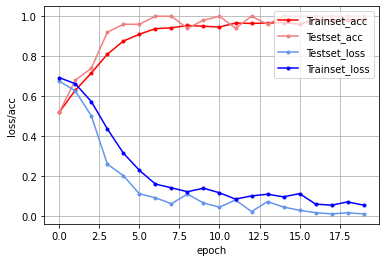

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

np.random.seed(3)
tf.random.set_seed(3)

train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,     #수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
                                  width_shift_range=0.1,  #전체 크기의 10% 범위에서 좌우로 이동합니다.
                                  height_shift_range=0.1, #마찬가지로 위, 아래로 이동합니다.
                                  #rotation_range=5,
                                  #shear_range=0.7,
                                  #zoom_range=[0.9, 2.2],
                                  #vertical_flip=True,
                                  fill_mode='nearest') 

train_generator = train_datagen.flow_from_directory(
       'train',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

#테스트 셋은 이미지 부풀리기 과정을 진행하지 않습니다.
test_datagen = ImageDataGenerator(rescale=1./255)  

test_generator = test_datagen.flow_from_directory(
       'test',   #테스트셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')


# 앞서 배운 CNN 모델을 만들어 적용해 보겠습니다.
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

#모델을 컴파일 합니다. 
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

#모델을 실행합니다
history = model.fit_generator(
       train_generator,
       steps_per_epoch=100,
       epochs=20,
       validation_data=test_generator,
       validation_steps=10)

#결과를 그래프로 표현하는 부분입니다.
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))  
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()


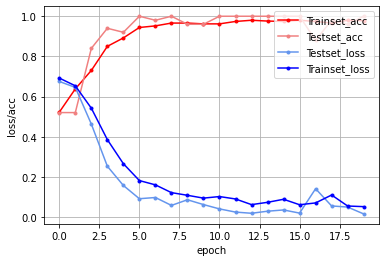

In [ ]:
#결과를 그래프로 표현하는 부분입니다.
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))  
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()